In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [41]:
df = pd.read_csv('data/organized_uber.csv', parse_dates=['record_time'])
df['hour'] = df.record_time.dt.hour
df['day'] = df.record_time.dt.day
df['date'] = df.record_time.dt.date
df['dayofweek'] = df.record_time.dt.dayofweek
df['minute'] = df.record_time.dt.minute
df.set_index('record_time', inplace=True)

In [22]:
df.city.unique()

array(['seattle', 'denver', 'sf', 'ny', 'chicago'], dtype=object)

1. Do preliminary EDA analysis and find the patterns over time
2. Build models like Linear regression as the baseline, then go on to more ensemble methods
    - use lags to determine training and testing sets
    - always make sure that the training set is the past data
        - e.g. trending over time
        -    training <-|-> testing
3. Cross-validation: always use correct past folds to predict the future
    - knowing how much of your past data will determine how well you can predict into the future
    - write your own KFold
    - lookup ARIMA linear regresssion repo

In [27]:
df[df.columns[:10]].head()

,city,display_name,price_estimate,low_estimate,avg_price_est,high_estimate,trip_duration,trip_distance,surge_multiplier,surge_minimum_price
record_time,,,,,,,,,,
2016-02-15 15:34:21.410,seattle,uberX,$21-29,21,25.0,29,1080,12.46,1,4
2016-02-15 15:34:21.410,seattle,uberXL,$40-53,40,46.5,53,1080,12.46,1,6
2016-02-15 15:34:21.410,seattle,uberPEDAL,$26-33,26,29.5,33,1080,12.46,1,9
2016-02-15 15:34:21.410,seattle,uberSELECT,$41-53,41,47.0,53,1080,12.46,1,8
2016-02-15 15:34:21.410,seattle,uberBLACK,$55,55,55.0,55,1080,12.46,1,12


In [29]:
df[df.columns[10:19]].head()

,pickup_estimate,capacity,base_price,base_minimum_price,cost_per_minute,cost_per_distance,distance_unit,cancellation_fee,currency_code
record_time,,,,,,,,,
2016-02-15 15:34:21.410,180,4,1.35,4.2,0.24,1.35,mile,5,USD
2016-02-15 15:34:21.410,240,6,3.00,6.2,0.30,2.75,mile,5,USD
2016-02-15 15:34:21.410,480,4,6.35,9.0,0.24,1.35,mile,5,USD
2016-02-15 15:34:21.410,240,4,4.00,8.2,0.30,2.75,mile,10,USD
2016-02-15 15:34:21.410,180,4,7.00,12.0,0.35,3.75,mile,10,USD


In [30]:
df[df.columns[20:]].head()

,service_fees_type,image,description,start_latitude,start_longitude,stop_latitude,stop_longitude,start_address,stop_address,product_id,hour,day,date,dayofweek,minute
record_time,,,,,,,,,,,,,,,
2016-02-15 15:34:21.410,Safe rides fee,http://d1a3f4spazzrp4.cloudfront.net/car-types...,The low-cost Uber,47.605454,-122.334654,47.451062,-122.300536,"248 Madison St, Seattle, WA 98104","9075 Airport Expy, SeaTac, WA 98188",6450cc0f-4d39-4473-8632-1e2c2049fefe,15,15,2016-02-15,0,34
2016-02-15 15:34:21.410,Safe rides fee,http://d1a3f4spazzrp4.cloudfront.net/car-types...,low-cost rides for large groups,47.605454,-122.334654,47.451062,-122.300536,"248 Madison St, Seattle, WA 98104","9075 Airport Expy, SeaTac, WA 98188",46c40aaf-e282-425a-8b46-b0a19344bb58,15,15,2016-02-15,0,34
2016-02-15 15:34:21.410,Safe rides fee,http://d1a3f4spazzrp4.cloudfront.net/car-types...,PEDAL,47.605454,-122.334654,47.451062,-122.300536,"248 Madison St, Seattle, WA 98104","9075 Airport Expy, SeaTac, WA 98188",4d2d9f77-542c-40c0-b96e-7be262300a60,15,15,2016-02-15,0,34
2016-02-15 15:34:21.410,Safe rides fee,http://d1a3f4spazzrp4.cloudfront.net/car-types...,A Step Above the Everyday,47.605454,-122.334654,47.451062,-122.300536,"248 Madison St, Seattle, WA 98104","9075 Airport Expy, SeaTac, WA 98188",68a65291-68f0-47e6-afd8-1dcb7c69403f,15,15,2016-02-15,0,34
2016-02-15 15:34:21.410,None,http://d1a3f4spazzrp4.cloudfront.net/car-types...,The original Uber,47.605454,-122.334654,47.451062,-122.300536,"248 Madison St, Seattle, WA 98104","9075 Airport Expy, SeaTac, WA 98188",aaa58858-2747-4170-ac8b-9b2839ff6d45,15,15,2016-02-15,0,34


In [31]:
df.describe()

,low_estimate,avg_price_est,high_estimate,trip_duration,trip_distance,surge_multiplier,surge_minimum_price,pickup_estimate,capacity,base_price,...,cancellation_fee,service_fees,start_latitude,start_longitude,stop_latitude,stop_longitude,hour,day,dayofweek,minute
count,1733950.000000,1733950.000000,1733950.000000,1889788.000000,1889788.000000,1889788.000000,1693679.000000,1889788.000000,1889788.000000,1688767.000000,...,1688767.000000,1889788.000000,1889788.000000,1889788.000000,1889788.000000,1889788.000000,1889788.000000,1889788.000000,1889788.000000,1889788.000000
mean,60.052899,67.710600,75.368302,1859.206895,17.294197,1.064094,12.303626,268.152650,4.487034,5.996053,...,7.673915,0.640363,41.611832,-101.844192,41.561955,-101.800764,11.514726,17.605804,2.920893,29.501859
std,32.141433,36.714348,41.552402,887.759322,4.541723,0.251278,7.073227,164.107845,1.220027,4.547451,...,2.493944,0.745005,3.328235,19.528008,3.310407,19.522316,6.934965,8.101270,1.997618,17.322542
min,0.000000,0.000000,0.000000,960.000000,10.790000,1.000000,0.000000,60.000000,1.000000,0.750000,...,5.000000,0.000000,37.776422,-122.418389,37.616720,-122.389393,0.000000,1.000000,0.000000,0.000000
25%,37.000000,42.500000,48.000000,1140.000000,13.450000,1.000000,7.000000,180.000000,4.000000,2.550000,...,5.000000,0.000000,39.740782,-122.334654,39.851727,-122.300536,5.000000,12.000000,1.000000,15.000000
50%,55.000000,62.000000,67.000000,1680.000000,17.200000,1.000000,11.000000,240.000000,4.000000,4.000000,...,10.000000,0.000000,40.759652,-104.991153,40.643800,-104.673804,12.000000,19.000000,3.000000,29.000000
75%,79.000000,86.500000,98.000000,2160.000000,18.990000,1.000000,15.000000,300.000000,6.000000,7.000000,...,10.000000,1.300000,41.877688,-87.630413,41.973551,-87.909057,18.000000,24.000000,5.000000,44.000000
max,631.000000,724.000000,817.000000,5760.000000,32.040000,8.900000,138.000000,4140.000000,10.000000,15.000000,...,10.000000,1.950000,47.605454,-73.984542,47.451062,-73.782000,23.000000,30.000000,6.000000,59.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1889788 entries, 2016-02-15 15:34:21.410000 to 2016-03-30 14:47:13.700000
Data columns (total 35 columns):
city                   object
display_name           object
price_estimate         object
low_estimate           float64
avg_price_est          float64
high_estimate          float64
trip_duration          int64
trip_distance          float64
surge_multiplier       float64
surge_minimum_price    float64
pickup_estimate        int64
capacity               int64
base_price             float64
base_minimum_price     float64
cost_per_minute        float64
cost_per_distance      float64
distance_unit          object
cancellation_fee       float64
currency_code          object
service_fees           float64
service_fees_type      object
image                  object
description            object
start_latitude         float64
start_longitude        float64
stop_latitude          float64
stop_longitude         float64
start_address    

In [33]:
df.corr()['avg_price_est'].sort_values(ascending=False)

avg_price_est          1.000000
high_estimate          0.997218
low_estimate           0.995347
surge_minimum_price    0.831499
base_minimum_price     0.729994
cost_per_distance      0.653112
base_price             0.630054
cancellation_fee       0.612091
cost_per_minute        0.600148
capacity               0.484046
trip_duration          0.393353
trip_distance          0.378379
stop_longitude         0.324594
start_longitude        0.322092
surge_multiplier       0.235310
hour                   0.022889
dayofweek              0.003876
minute                 0.003662
day                    0.001671
stop_latitude         -0.247565
start_latitude        -0.254555
pickup_estimate       -0.287021
service_fees          -0.408168
Name: avg_price_est, dtype: float64

### What is the change in estimated price of uberX within 24 hours in Denver? (on 2016-02-16)

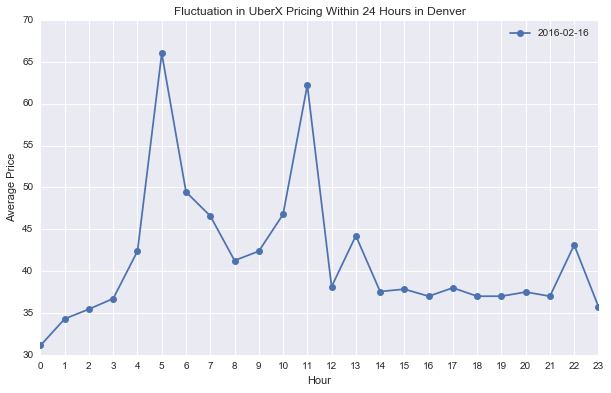

In [4]:
df[(df['display_name'] == 'uberX') & (df['city'] == 'denver')]. \
ix['2016-02-16'].groupby('hour').mean()['avg_price_est'].plot(marker='o', figsize=(10,6), label='2016-02-16')
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.legend(loc='best')
plt.xticks(np.arange(0,24,1))
plt.title('Fluctuation in UberX Pricing Within 24 Hours in Denver');

### What is the change in estimated price of uberX within 24 hours in Denver for a week?

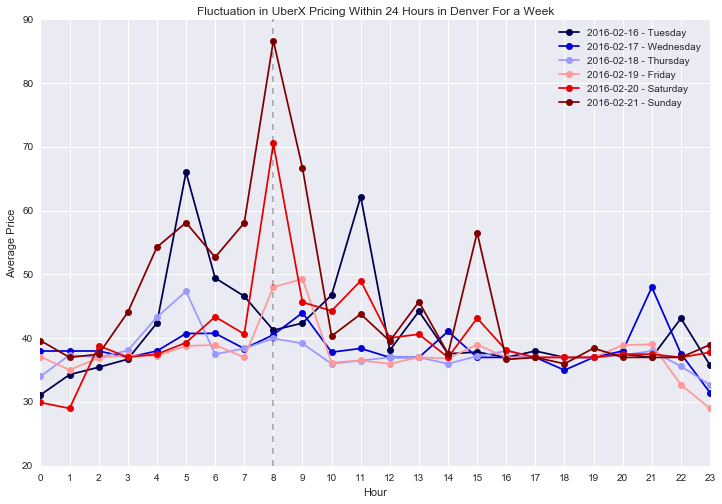

In [10]:
dates = ['2016-02-16','2016-02-17','2016-02-18','2016-02-19','2016-02-20','2016-02-21']
dofwk = ['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cmap = cm.get_cmap('seismic')
for i,date in enumerate(dates):
    df[(df['display_name'] == 'uberX') & (df['city'] == 'denver')]. \
    ix[date].groupby('hour').mean()['avg_price_est']. \
    plot(marker='o', figsize=(12,8), color=cmap((2*i)/10.), label='{} - {}'.format(date,dofwk[i]))
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.axvline(8, ls='--', color='k', alpha=0.3)
plt.legend(loc='best')
plt.xticks(np.arange(0,24,1))
plt.title('Fluctuation in UberX Pricing Within 24 Hours in Denver For a Week');

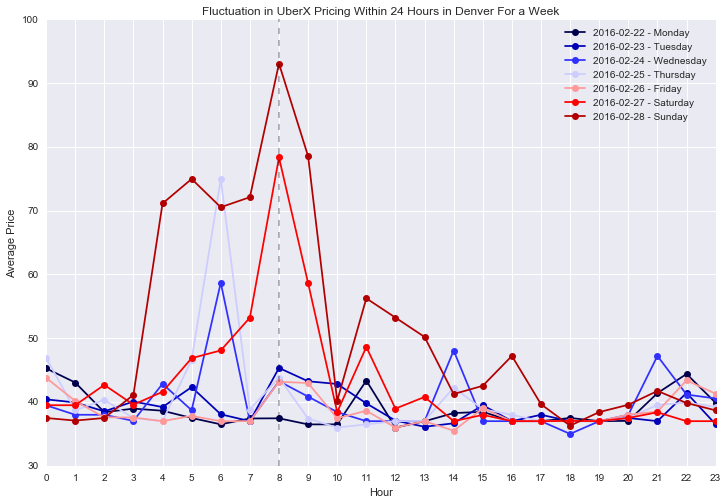

In [11]:
dates = ['2016-02-22','2016-02-23','2016-02-24','2016-02-25','2016-02-26','2016-02-27','2016-02-28']
dofwk = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cmap = cm.get_cmap('seismic')
for i,date in enumerate(dates):
    df[(df['display_name'] == 'uberX') & (df['city'] == 'denver')]. \
    ix[date].groupby('hour').mean()['avg_price_est']. \
    plot(marker='o', figsize=(12,8), color=cmap((1.5*i)/10.), label='{} - {}'.format(date,dofwk[i]))
plt.xlabel('Hour')
plt.ylabel('Average Price')
plt.axvline(8, ls='--', color='k', alpha=0.3)
plt.legend(loc='best')
plt.xticks(np.arange(0,24,1))
plt.title('Fluctuation in UberX Pricing Within 24 Hours in Denver For a Week');

### What is the change in estimated price of uberX within 24 hours in the all cities for a week?

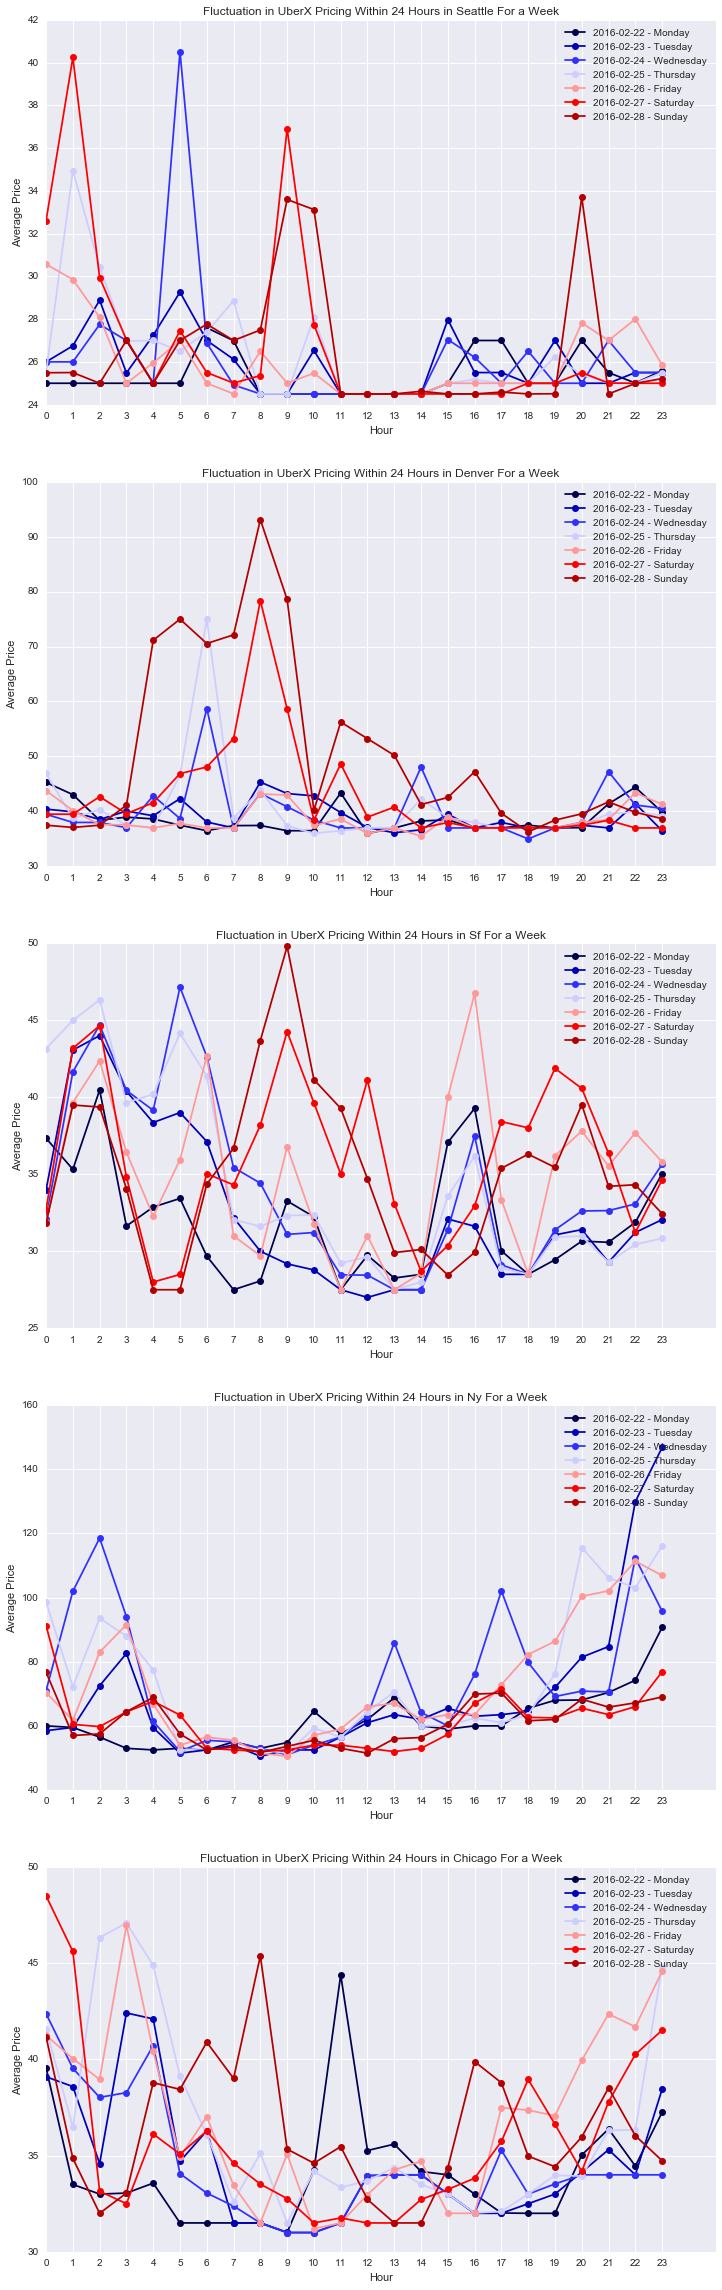

In [12]:
dates = ['2016-02-22','2016-02-23','2016-02-24','2016-02-25','2016-02-26','2016-02-27','2016-02-28']
dofwk = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cmap = cm.get_cmap('seismic')
cities = df.city.unique()
fig, ax = plt.subplots(5,1, figsize=(12,40))
for i, axs in enumerate(ax.reshape(5,)):
    for j,date in enumerate(dates):
        bydate = df[(df['display_name'] == 'uberX') & (df['city'] == cities[i])]. \
        ix[date].groupby('hour').mean()['avg_price_est']
        axs.plot(bydate, marker='o', color=cmap((1.5*j)/10.), label='{} - {}'.format(date,dofwk[j]))
    axs.set_xlabel('Hour')
    axs.set_ylabel('Average Price')
    # plt.axvline(8, ls='--', color='k', alpha=0.3)
    axs.legend(loc='upper right')
    axs.set_xticks(np.arange(0,24,1))
    axs.set_title('Fluctuation in UberX Pricing Within 24 Hours in {} For a Week'.format(cities[i].capitalize()));

### What are the differences in pricing on weekdays between cities within 24 hour timespan using UberX?

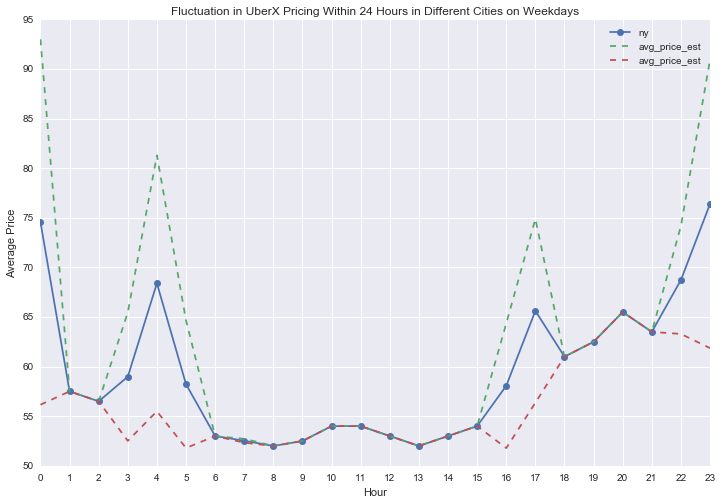

In [18]:
for city in ['ny']:
    mean = df[(df['display_name'] == 'uberX') & (df['city'] == city)]. \
    ix['2016-02-20'].groupby('hour').mean()['avg_price_est']
    mean.plot(marker='o', figsize=(12,8), label='{}'.format(city))
    std = df[(df['display_name'] == 'uberX') & (df['city'] == city)]. \
    ix['2016-02-20'].groupby('hour').std()['avg_price_est']
    (mean+std).plot(linestyle='--', figsize=(12,8))
    (mean-std).plot(linestyle='--', figsize=(12,8))
    break
plt.xlabel('Hour')
plt.ylabel('Average Price')
# plt.axvline(8, ls='--', color='k', alpha=0.3)
plt.legend(loc='best')
plt.xticks(np.arange(0,24,1))
plt.title('Fluctuation in UberX Pricing Within 24 Hours in Different Cities on Weekdays');

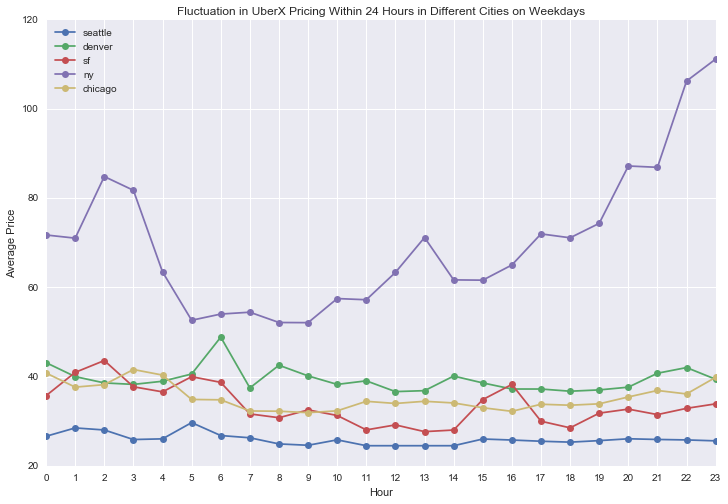

In [14]:
for city in df['city'].unique():
    df[(df['display_name'] == 'uberX') & (df['city'] == city)]. \
    ix['2016-02-22':'2016-02-26'].groupby('hour').mean()['avg_price_est'].plot(marker='o', figsize=(12,8), label='{}'.format(city))
plt.xlabel('Hour')
plt.ylabel('Average Price')
# plt.axvline(8, ls='--', color='k', alpha=0.3)
plt.legend(loc='best')
plt.xticks(np.arange(0,24,1))
plt.title('Fluctuation in UberX Pricing Within 24 Hours in Different Cities on Weekdays');

In [12]:
df['display_name'].value_counts()

UberBLACK      302598
UberSUV        302579
uberX          301236
uberXL         299545
uberSELECT     152807
uberTAXI       104992
UberSELECT      88915
For Hire        60352
uberESPANOL     56521
uberFAMILY      56438
Yellow WAV      54324
uberT           40335
ASSIST          35196
PEDAL           21000
uberCAB         10511
uberWAV          2124
WarmUpChi         295
#UberTAHOE         20
Name: display_name, dtype: int64

### What are the different available car services in each city?

1. UberX: The least expensive Uber service. Seats 4 riders. Drivers use sedans like Toyota Prius, Honda Accord. Known as UberPop in Europe.
2. UberXL: Seats at least 6 passengers. An UberXL car will be an SUV or a Minivan. Higher fare price than UberX
3. UberSelect: A luxury sedan that seats up to 4 riders. Expect a BMW, Mercededs, Audi, etc with a leather interior. Formerly known at UberPlus in some markets.
4. UberPOOL: Share your ride with another person and split the cost. Only available in LA, SF, NYC, and Paris. Read more about POOL. (not included)
5. UberBLACK (Black Car): Uber’s ‘executive’ luxury service. Commercially registered and insured livery vehicles, typically a black SUV or luxury sedan. Highest fare price
6. UberSUV: UberSUV is the premium luxury version of UberXL, UberSUV is also the 6 passenger version of UberBlack, just like UberXL is the 6 passenger version of UberX.
7. UberTAXI (or UberT): This calls a taxi that has an agreement with Uber. These taxis are much like any normal taxi, except that you can pay through the app.
8. For Hire: A low-cost option with rates comparable to UberX, Uber’s cheaper service that lets random people use their cars to transport passengers.
9. UberESPANOL: UberX with a Spanish-speaking driver-partner
10. UberFAMILY: The on-demand car seat option for parents on the go. With the touch of a button and a 10 dollar surcharge, you can get around the city with your child safely buckled up. Rates for uberFAMILY will be the same as uberX, plus a 10 dollar surcharge
11. Yellow WAV: uberTAXI partners who are driving Yellow Wheelchair Accessible Vehicle Taxis
12. UberWAV: Wheelchair accessible vehicle option, connecting riders with paratransit drivers in vehicles that are equipped with hydraulic ramps or lifts
13. UberASSIST: Designed to provide additional assistance to seniors and people with disabilities. Driver-partners are specifically trained by Open Doors Organization to assist riders into vehicles and can accommodate folding wheelchairs, walkers, and scooters.
14. UberPEDAL: Rates for UberPEDAL will be the same as uberX, plus a 5 dollar surcharge. Each Saris rack can fit two bicycles
15. WarmUpChi: For most Chicagoans, February means bad weather, cold commutes, and dreams of a vacation. Not for you! Break out of the mid-week, mid-winter rut with FREE rides every Wednesday, courtesy of Visit St. Pete/Clearwater. Lucky you—it doesn’t stop with a warm and cozy ride. Just by entering the code, you’re automatically entered to win a weekend getaway for two to sunny Florida.

In [13]:
for city in df['city'].unique():
    print city, df.query("city == @city")['display_name'].unique()

seattle ['uberX' 'uberXL' 'PEDAL' 'uberSELECT' 'UberBLACK' 'UberSUV' 'For Hire']
denver ['uberX' 'uberXL' 'uberSELECT' 'UberBLACK' 'UberSUV' 'UberSELECT']
sf ['uberX' 'uberXL' 'uberSELECT' 'UberBLACK' 'UberSUV' 'ASSIST' 'uberTAXI'
 'uberWAV' '#UberTAHOE']
ny ['uberX' 'uberXL' 'UberBLACK' 'UberSUV' 'Yellow WAV' 'uberT' 'uberFAMILY']
chicago ['uberX' 'uberXL' 'uberESPANOL' 'UberSELECT' 'UberBLACK' 'UberSUV'
 'uberTAXI' 'WarmUpChi' 'uberCAB']


In [15]:
df['display_name'].replace(['UberBLACK','UberSUV','UberSELECT','uberT','Yellow WAV','ASSIST','PEDAL','For Hire','#UberTAHOE','uberCAB','WarmUpChi'], 
                           ['uberBLACK','uberSUV','uberSELECT','uberTAXI','uberWAV','uberASSIST','uberPEDAL','uberTAXI','uberTAHOE','uberTAXI','uberWARMUP'], inplace=True)

In [34]:
df['display_name'].value_counts()

uberBLACK      302598
uberSUV        302579
uberX          301236
uberXL         299545
uberSELECT     241722
uberTAXI       216190
uberESPANOL     56521
uberWAV         56448
uberFAMILY      56438
uberASSIST      35196
uberPEDAL       21000
uberWARMUP        295
uberTAHOE          20
Name: display_name, dtype: int64

In [42]:
for city in df['city'].unique():
    print city, df.query("city == @city")['display_name'].unique()

seattle ['uberX' 'uberXL' 'uberPEDAL' 'uberSELECT' 'uberBLACK' 'uberSUV' 'uberTAXI']
denver ['uberX' 'uberXL' 'uberSELECT' 'uberBLACK' 'uberSUV']
sf ['uberX' 'uberXL' 'uberSELECT' 'uberBLACK' 'uberSUV' 'uberASSIST'
 'uberTAXI' 'uberWAV' 'uberTAHOE']
ny ['uberX' 'uberXL' 'uberBLACK' 'uberSUV' 'uberWAV' 'uberTAXI' 'uberFAMILY']
chicago ['uberX' 'uberXL' 'uberESPANOL' 'uberSELECT' 'uberBLACK' 'uberSUV'
 'uberTAXI' 'uberWARMUP']


### What is the differences in prices for the different tier of car services at Uber?

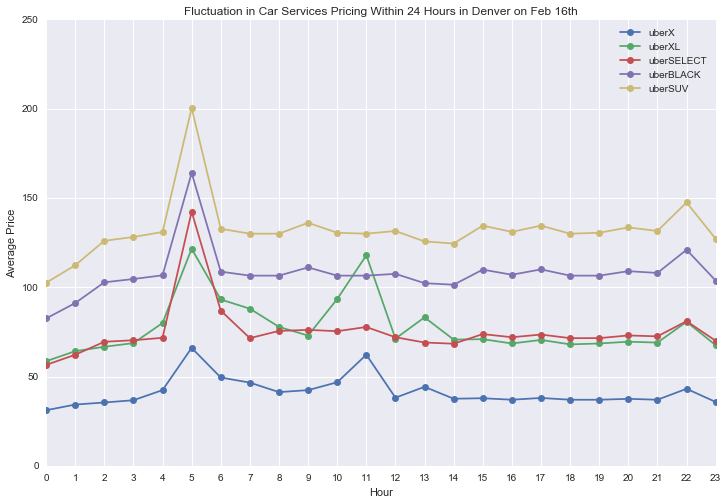

In [36]:
cartypes = ['uberX','uberXL','uberSELECT','uberBLACK','uberSUV']
for cartype in cartypes:
    df[(df['display_name'] == cartype) & (df['city'] == 'denver')]. \
    ix['2016-02-16'].groupby('hour').mean()['avg_price_est'].plot(marker='o', figsize=(12,8), label='{}'.format(cartype))
plt.xlabel('Hour')
plt.ylabel('Average Price')
# plt.axvline(8, ls='--', color='k', alpha=0.3)
plt.legend(loc='best')
plt.xticks(np.arange(0,24,1))
plt.title('Fluctuation in Car Services Pricing Within 24 Hours in Denver on Feb 16th');

### Are there drastic differences in pricing between weekdays and weekends for all tiers of car services?

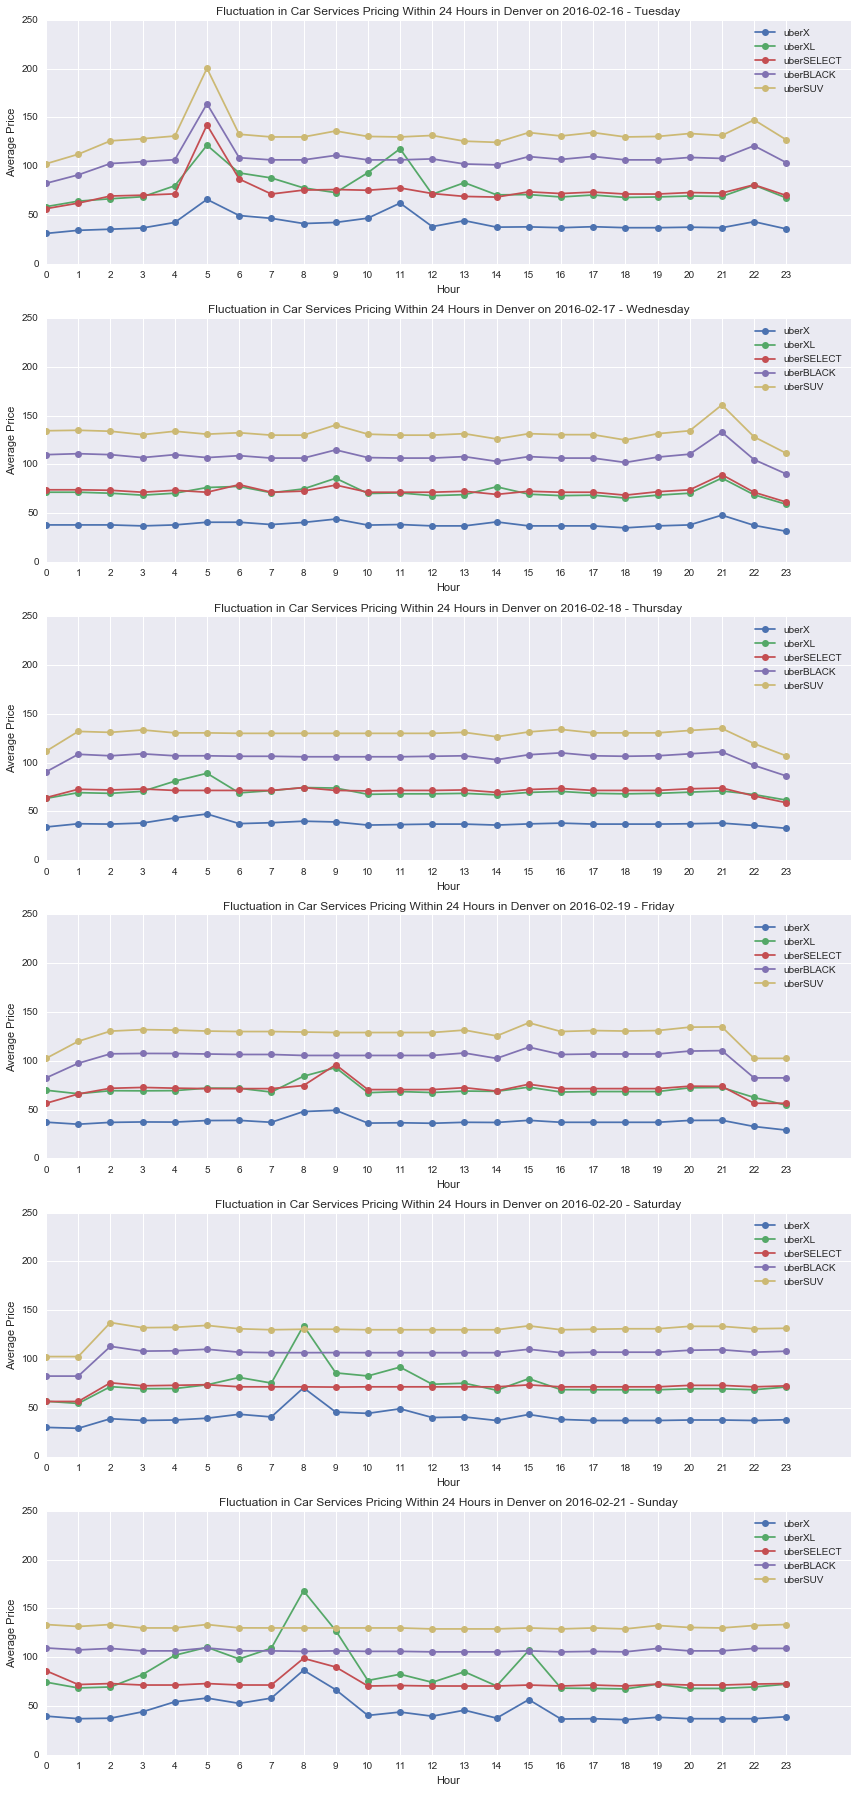

In [21]:
cartypes = ['uberX','uberXL','uberSELECT','uberBLACK','uberSUV']
dates = ['2016-02-16','2016-02-17','2016-02-18','2016-02-19','2016-02-20','2016-02-21']
dofwk = ['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, ax = plt.subplots(6,1, figsize=(12,25))
for i, axs in enumerate(ax.reshape(6,)):
    for cartype in cartypes:
        bycar = df[(df['display_name'] == cartype) & (df['city'] == 'denver')].ix[dates[i]].groupby('hour').mean()['avg_price_est']
        axs.plot(bycar, marker='o', label='{}'.format(cartype))
    axs.set_xlabel('Hour')
    axs.set_ylabel('Average Price')
    # plt.axvline(8, ls='--', color='k', alpha=0.3)
    axs.legend(loc='upper right')
    axs.set_xticks(np.arange(0,24,1))
    axs.set_yticks(np.arange(0,251,50))
    axs.set_title('Fluctuation in Car Services Pricing Within 24 Hours in Denver on {} - {}'.format(dates[i],dofwk[i]))
plt.tight_layout();

### Can I capture the weekend price spikes?

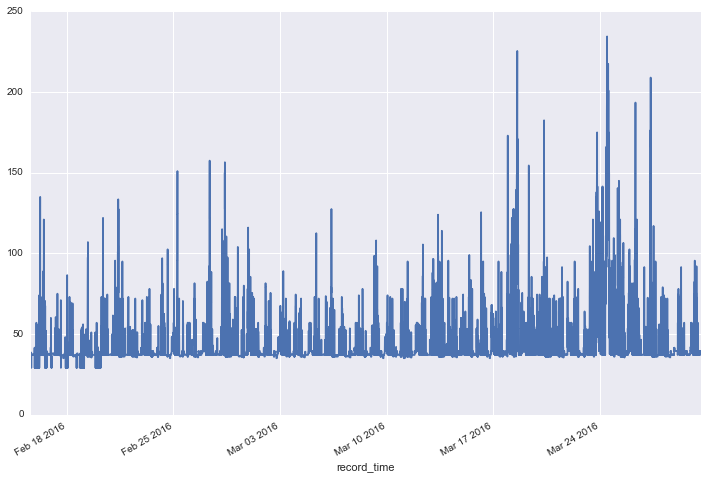

In [6]:
df[(df['city'] == 'denver') & (df['display_name'] == 'uberX')]['avg_price_est'].plot(figsize=(12,8));
# avg price estimate per minute from feb 17th - feb 29th 2016 for denver/uberX

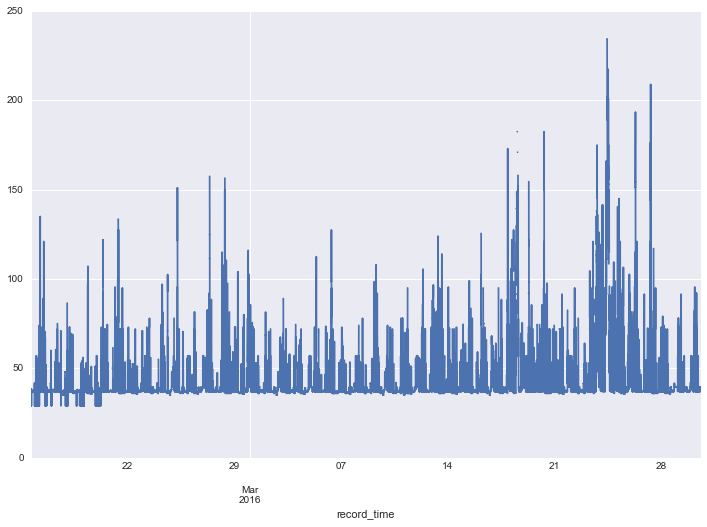

In [7]:
# df[df['city'] == 'denver'].reset_index().groupby(['record_time','hour']).mean()['avg_price_est'].plot(figsize=(12,8));
df[(df['city'] == 'denver') & (df['display_name'] == 'uberX')].resample('T')['avg_price_est'].plot(figsize=(12,8));
# resample by minute

(0, 199.44833333333335)

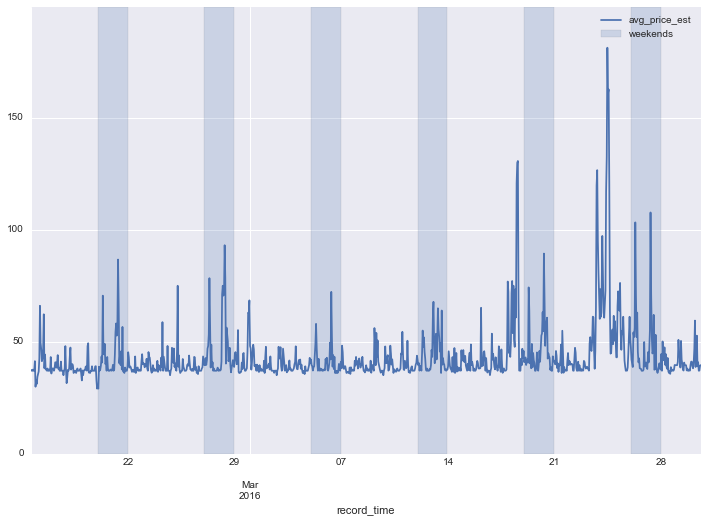

In [5]:
hourly = df[(df['city'] == 'denver') & (df['display_name'] == 'uberX')].resample('H')
hourly['avg_price_est'].plot(figsize=(12,8));
plt.fill_between(hourly.index, 0, hourly['avg_price_est'].max()*1.1, where=hourly['dayofweek'] >= 5, alpha=0.2, label='weekends');
plt.legend(loc='best');
plt.ylim([0,hourly['avg_price_est'].max()*1.1])
# resample by hour

### Why are the NY prices so high compared to other cities? Does it have to do with the distance travelled/travel duration?

In [8]:
trip_avg = df.groupby('city').mean()[['trip_duration','trip_distance','avg_price_est']].sort_values(by=['trip_duration'],ascending=False)
trip_avg

,trip_duration,trip_distance,avg_price_est
city,,,
ny,3122.317977,17.330243,85.177407
denver,2148.094360,26.122639,89.458695
chicago,1790.998121,18.776877,66.679238
sf,1196.404810,13.527077,56.896696
seattle,1095.914977,12.618234,45.208330


In [9]:
trip_avg['trip_minutes'] = trip_avg['trip_duration'] / 60.
trip_avg

,trip_duration,trip_distance,avg_price_est,trip_minutes
city,,,,
ny,3122.317977,17.330243,85.177407,52.038633
denver,2148.094360,26.122639,89.458695,35.801573
chicago,1790.998121,18.776877,66.679238,29.849969
sf,1196.404810,13.527077,56.896696,19.940080
seattle,1095.914977,12.618234,45.208330,18.265250


In [10]:
trip_avg['avg_price_per_min'] = trip_avg['avg_price_est'] / trip_avg['trip_minutes']
trip_avg

,trip_duration,trip_distance,avg_price_est,trip_minutes,avg_price_per_min
city,,,,,
ny,3122.317977,17.330243,85.177407,52.038633,1.636811
denver,2148.094360,26.122639,89.458695,35.801573,2.498736
chicago,1790.998121,18.776877,66.679238,29.849969,2.233813
sf,1196.404810,13.527077,56.896696,19.940080,2.853384
seattle,1095.914977,12.618234,45.208330,18.265250,2.475101


### What is the average price per trip minute for each city within 24 hours? (Normalized)

In [11]:
df['trip_minutes'] = df['trip_duration'] / 60.
df['avg_price_per_min'] = df['avg_price_est'] / df['trip_minutes']

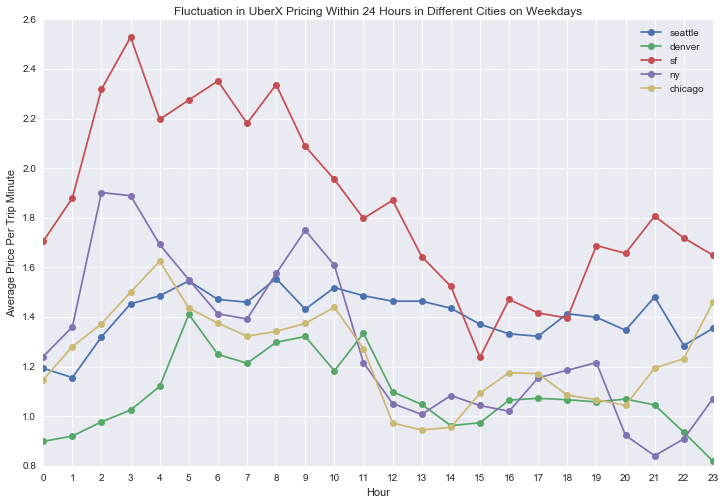

In [12]:
for city in df['city'].unique():
    df[(df['display_name'] == 'uberX') & (df['city'] == city)]. \
    ix['2016-02-16':'2016-02-19'].groupby('hour').mean()['avg_price_per_min'].plot(marker='o', figsize=(12,8), label='{}'.format(city))
plt.xlabel('Hour')
plt.ylabel('Average Price Per Trip Minute')
# plt.axvline(8, ls='--', color='k', alpha=0.3)
plt.legend(loc='best')
plt.xticks(np.arange(0,24,1))
plt.title('Fluctuation in UberX Pricing Within 24 Hours in Different Cities on Weekdays');

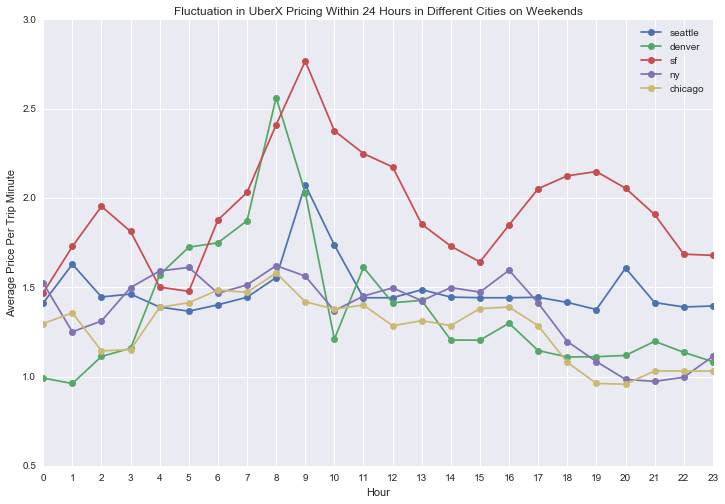

In [13]:
for city in df['city'].unique():
    df[(df['display_name'] == 'uberX') & (df['city'] == city)]. \
    ix['2016-02-27':'2016-02-28'].groupby('hour').mean()['avg_price_per_min'].plot(marker='o', figsize=(12,8), label='{}'.format(city))
plt.xlabel('Hour')
plt.ylabel('Average Price Per Trip Minute')
# plt.axvline(8, ls='--', color='k', alpha=0.3)
plt.legend(loc='best')
plt.xticks(np.arange(0,24,1))
plt.title('Fluctuation in UberX Pricing Within 24 Hours in Different Cities on Weekends');

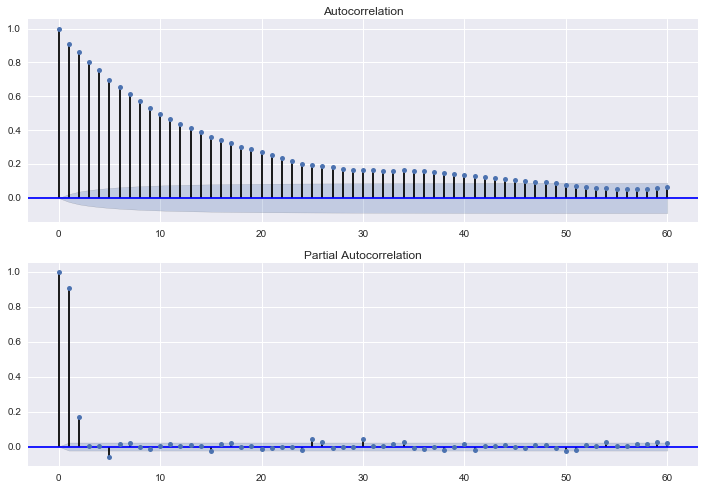

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_pacf(data, lags):
    """
    Input: Amount of lag
    Output: Plot of ACF/PACF
    """
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data, lags=lags, ax=ax2)
data = df.ix[:'2016-02-20'].query("display_name == 'uberX' and city == 'denver'")
plot_acf_pacf(data['avg_price_est'], lags=60)

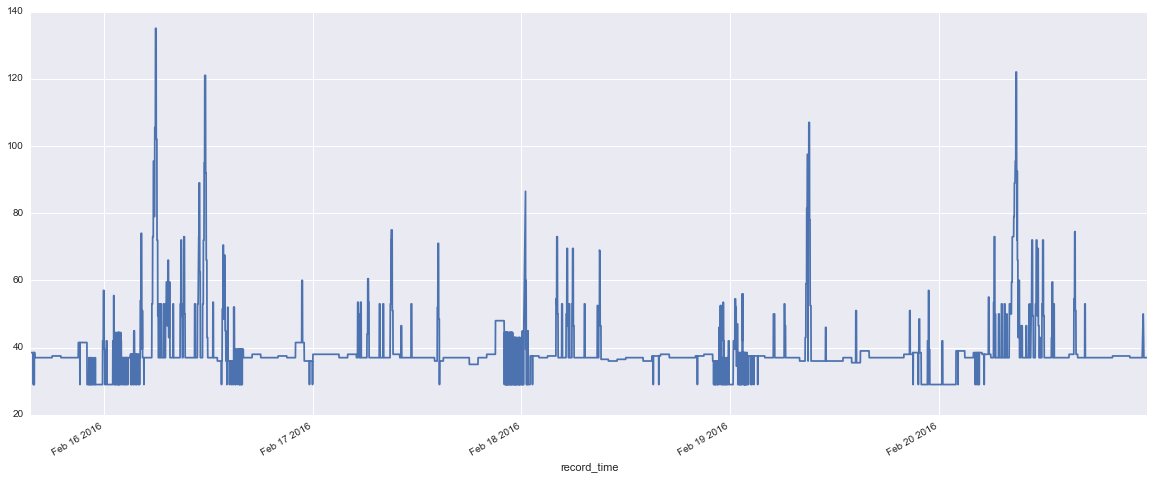

In [93]:
df.ix[:'2016-02-20'].query("display_name == 'uberX' and city == 'denver'")['avg_price_est'].plot(figsize=(20,8));

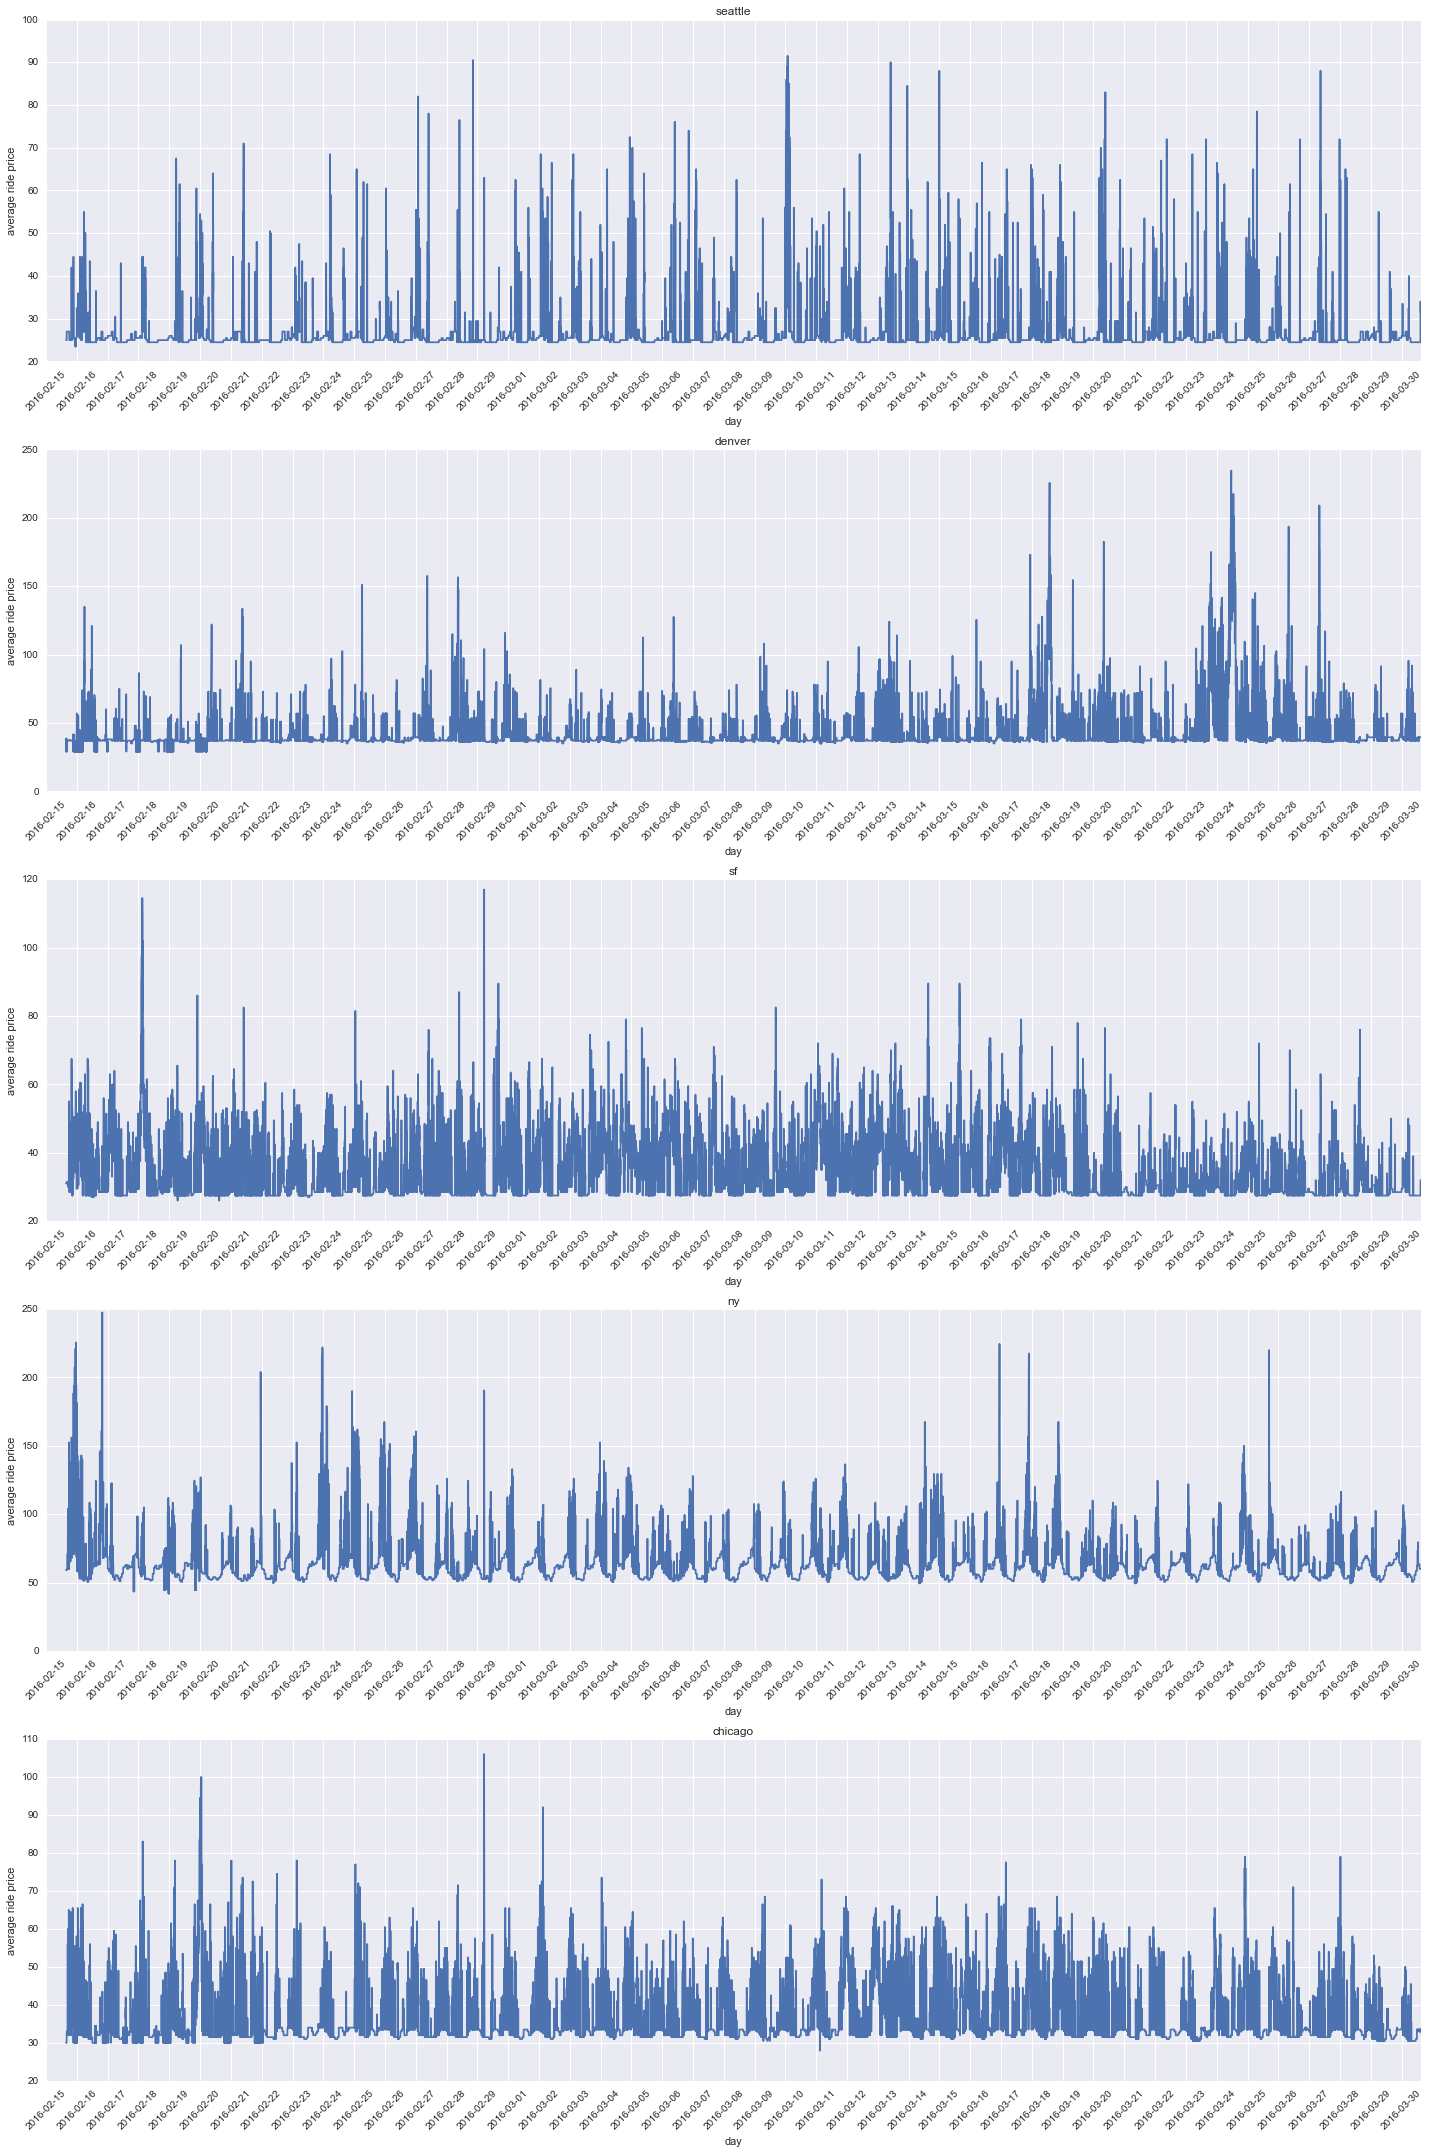

In [113]:
cities = df['city'].unique().tolist()
fig, ax = plt.subplots(5,1, figsize=(20,30))
d = df.query("display_name == 'uberX' and city == 'denver'")['avg_price_est']
dates = np.unique(d.index.date)
for i, axs in enumerate(ax.reshape(5,)):
    data = df.query("display_name == 'uberX' and city == @cities[@i]")['avg_price_est']
    axs.plot(data)
    axs.set_title(cities[i])
    axs.set_ylabel('average ride price')
    axs.set_xlabel('day')
    axs.set_xticks(dates)
    axs.set_xticklabels(dates, rotation='45')
plt.tight_layout()